<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Web Scraping Lab**


Estimated time needed: **30** minutes


## Objectives


After completing this lab you will be able to:


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="https://bso/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Beautiful Soup Object</a>
            <ul>
                <li>Tag</li>
                <li>Children, Parents, and Siblings</li>
                <li>HTML Attributes</li>
                <li>Navigable String</li>
            </ul>
        </li>
     </ul>
    <ul>
        <li>
            <a href="https://filter/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Filter</a>
            <ul>
                <li>find All</li>
                <li>find </li>
                <li>HTML Attributes</li>
                <li>Navigable String</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a href="https://dscw/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Downloading And Scraping The Contents Of A Web</a>
    </li>
         </ul>
    <p>
        Estimated time needed: <strong>25 min</strong>
    </p>

</div>

<hr>


For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.


In [1]:
!mamba install bs4==4.10.0 -y
!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y
# !pip install requests==2.26.0

/usr/bin/sh: 1: mamba: not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.5
    Uninstalling lxml-4.2.5:
      Successfully uninstalled lxml-4.2.5
/usr/bin/sh: 1: mamba: not found


Import the required modules and functions


In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

<h2 id="BSO">Beautiful Soup Objects</h2>


Beautiful Soup is a Python library for pulling data out of HTML and XML files, we will focus on HTML files. This is accomplished by representing the HTML as a set of objects with methods used to parse the HTML.  We can navigate the HTML as a tree and/or filter out what we are looking for.

Consider the following HTML:


In [3]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

We can store it as a string in the variable HTML:


In [4]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

To parse a document, pass it into the <code>BeautifulSoup</code> constructor, the <code>BeautifulSoup</code> object, which represents the document as a nested data structure:


In [5]:
soup = BeautifulSoup(html, "html.parser")

First, the document is converted to Unicode, (similar to ASCII),  and HTML entities are converted to Unicode characters. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. The <code>BeautifulSoup</code> object can create other types of objects. In this lab, we will cover <code>BeautifulSoup</code> and <code>Tag</code> objects that for the purposes of this lab are identical, and <code>NavigableString</code> objects.


We can use the method <code>prettify()</code> to display the HTML in the nested structure:


In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>


## Tags


Let's say we want the  title of the page and the name of the top paid player we can use the <code>Tag</code>. The <code>Tag</code> object corresponds to an HTML tag in the original document, for example, the tag title.


In [7]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


we can see the tag type <code>bs4.element.Tag</code>


In [8]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


If there is more than one <code>Tag</code>  with the same name, the first element with that <code>Tag</code> name is called, this corresponds to the most paid player:


In [9]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

Enclosed in the bold attribute <code>b</code>, it helps to use the tree representation. We can navigate down the tree using the child attribute to get the name.


### Children, Parents, and Siblings


As stated above the <code>Tag</code> object is a tree of objects we can access the child of the tag or navigate down the branch as follows:


In [10]:
tag_child =tag_object.b
tag_child

<b id="boldest">Lebron James</b>

You can access the parent with the <code> parent</code>


In [11]:
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

this is identical to


In [12]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

<code>tag_object</code> parent is the <code>body</code> element.


In [13]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

<code>tag_object</code> sibling is the <code>paragraph</code> element


In [14]:
sibling_1=tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

`sibling_2` is the `header` element which is also a sibling of both `sibling_1` and `tag_object`


In [15]:
sibling_2=sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

<h3 id="first_question">Exercise: <code>next_sibling</code></h3>


Using the object <code>sibling\_2</code> and the property <code>next_sibling</code> to find the salary of Stephen Curry:


In [42]:
def find_salary(soup, name):
  print ("Searching for '" + name + "'...")
  while soup.text.find(name) == -1:
    print ("\t"+soup.text + "...")
    soup = soup.next_sibling

  print ("\t"+soup.text + "...")
  if soup.text.find(name) != -1:
    print ("Found '" + name + "'!!!")
    aim = soup
    
    print ("\t"+aim.text)
    while aim.text.find("Salary") == -1:
      aim = aim.next_sibling
      print ("\t"+aim.text)
    
    return aim.text
  else:
    return None

#print("\n" + find_salary(tag_object, "Stephen Curry"))
print("\n" + find_salary(sibling_2, "Stephen Curry"))


Searching for 'Stephen Curry'...
	 Stephen Curry...
Found 'Stephen Curry'!!!
	 Stephen Curry
	 Salary: $85,000, 000 

 Salary: $85,000, 000 


<details><summary>Click here for the solution</summary>

```
sibling_2.next_sibling

```

</details>


### HTML Attributes


If the tag has attributes, the tag <code>id="boldest"</code> has an attribute <code>id</code> whose value is <code>boldest</code>. You can access a tag’s attributes by treating the tag like a dictionary:


In [43]:
tag_child['id']

'boldest'

You can access that dictionary directly as <code>attrs</code>:


In [44]:
tag_child.attrs

{'id': 'boldest'}

You can also work with Multi-valued attribute check out <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">\[1]</a> for more.


We can also obtain the content if the attribute of the <code>tag</code> using the Python <code>get()</code> method.


In [45]:
tag_child.get('id')

'boldest'

### Navigable String


A string corresponds to a bit of text or content within a tag. Beautiful Soup uses the <code>NavigableString</code> class to contain this text. In our HTML we can obtain the name of the first player by extracting the sting of the <code>Tag</code> object <code>tag_child</code> as follows:


In [51]:
tag_string=tag_child.string
#tag_string=tag_child.text
tag_string

'Lebron James'

we can verify the type is Navigable String


In [52]:
type(tag_string)

bs4.element.NavigableString

A NavigableString is just like a Python string or Unicode string, to be more precise. The main difference is that it also supports some  <code>BeautifulSoup</code> features. We can covert it to sting object in Python:


In [53]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

<h2 id="filter">Filter</h2>


Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string.  Consider the following HTML of rocket launchs:


In [54]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


We can store it as a string in the variable <code>table</code>:


In [55]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [56]:
table_bs = BeautifulSoup(table, "html.parser")

## find All


The <code>find_all()</code> method looks through a tag’s descendants and retrieves all descendants that match your filters.

<p>
The Method signature for <code>find_all(name, attrs, recursive, string, limit, **kwargs)<c/ode>
</p>


### Name


When we set the <code>name</code> parameter to a tag name, the method will extract all the tags with that name and its children.


In [66]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

The result is a Python Iterable just like a list, each element is a <code>tag</code> object:


In [64]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

The type is <code>tag</code>


In [59]:
print(type(first_row))

<class 'bs4.element.Tag'>


we can obtain the child


In [60]:
first_row.td

<td id="flight">Flight No</td>

If we iterate through the list, each element corresponds to a row in the table:


In [67]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)
    

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


As <code>row</code> is a <code>cell</code> object, we can apply the method <code>find_all</code> to it and extract table cells in the object <code>cells</code> using the tag <code>td</code>, this is all the children with the name <code>td</code>. The result is a list, each element corresponds to a cell and is a <code>Tag</code> object, we can iterate through this list as well. We can extract the content using the <code>string</code>  attribute.


In [29]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>
colunm 2 cell <td>80 kg</td>


If we use a list we can match against any item in that list.


In [62]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>,
 <td>80 kg</td>]

## Attributes


If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example the <code>id</code>  argument, Beautiful Soup will filter against each tag’s <code>id</code> attribute. For example, the first <code>td</code> elements have a value of <code>id</code> of <code>flight</code>, therefore we can filter based on that <code>id</code> value.


In [63]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

We can find all the elements that have links to the Florida Wikipedia page:


In [68]:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

If we set the  <code>href</code> attribute to True, regardless of what the value is, the code finds all tags with <code>href</code> value:


In [69]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

There are other methods for dealing with attributes and other related methods; Check out the following <a href='https://www.crummy.com/software/BeautifulSoup/bs4/doc/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01#css-selectors'>link</a>


<h3 id="exer_type">Exercise: <code>find_all</code></h3>


Using the logic above, find all the elements without <code>href</code> value


In [70]:
table_bs.find_all(href=False)

[<table><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr></table>,
 <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <a></a>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 k

<details><summary>Click here for the solution</summary>

```
table_bs.find_all(href=False)

```

</details>


Using the soup object <code>soup</code>, find the element with the <code>id</code> attribute content set to <code>"boldest"</code>.


In [72]:
soup.find_all(id="boldest")

[<b id="boldest">Lebron James</b>]

<details><summary>Click here for the solution</summary>

```
soup.find_all(id="boldest")

```

</details>


### string


With string you can search for strings instead of tags, where we find all the elments with Florida:


In [73]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

## find


The <code>find_all()</code> method scans the entire document looking for results, it’s if you are looking for one element you can use the <code>find()</code> method to find the first element in the document. Consider the following two table:


In [74]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


We store the HTML as a Python string and assign <code>two_tables</code>:


In [75]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

We create a <code>BeautifulSoup</code> object  <code>two_tables_bs</code>


In [76]:
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

We can find the first table using the tag name table


In [77]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore.


In [39]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

<h2 id="DSCW">Downloading And Scraping The Contents Of A Web Page</h2> 


We Download the contents of the web page:


In [78]:
url = "http://www.ibm.com"

We use <code>get</code> to download the contents of the webpage in text format and store in a variable called <code>data</code>:


In [81]:
data  = requests.get(url).text 
#data

We create a <code>BeautifulSoup</code> object using the <code>BeautifulSoup</code> constructor


In [82]:
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape all links


In [83]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))


https://www.ibm.com/br/pt
https://www.ibm.com/sitemap/br/pt
https://www.ibm.com/br-pt/products/linuxone-emperor-4
https://www.ibm.com/br-pt/analytics/data-fabric
https://www.ibm.com/br-pt/cloud/campaign/cloud-simplicity
https://www.ibm.com/consulting/br-pt/
https://www.ibm.com/br-pt/cloud/aiops
https://www.ibm.com/br-pt/about/secure-your-business
https://www.ibm.com/downloads/cas/YJ278OVX
https://www.ibm.com/br-pt/it-infrastructure/storage/flash
/br-pt/products/offers-and-discounts?lnk=hpv18t5
https://www.ibm.com/br-pt/products/maas360
https://www.ibm.com/br-pt/products/maximo
https://www.ibm.com/br-pt/about/automation
https://www.ibm.com/br-pt/analytics/data-fabric
https://www.ibm.com/br-pt/products/robotic-process-automation
https://www.ibm.com/br-pt/qradar
https://developer.ibm.com/depmodels/cloud/?lnk=hpv18ct16
https://developer.ibm.com/technologies/artificial-intelligence?lnk=hpv18ct19
https://developer.ibm.com/?lnk=hpv18ct9
https://www.ibm.com/docs/en?lnk=hpv18ct14
https://www.re

## Scrape  all images  Tags


In [85]:
import requests
import os 

params = {
    "text_url": '',
    "data_path": ''
}

def get_info(url, show=False):
    try:
        if show == True:
            print("[get_info]::URL: ",url)
        r=requests.get(url)
    except requests.exceptions.RequestException as e:
        print("RequestException:: '"+e+"'")
        r = None
    except Exception as e:
        print("Exception:: '"+e+"'")
        r = None
    else:
        if show == True:
            print("Status code:",r.status_code)
            print("Headers:    ",r.headers)
            print("Content:    ",r.content)
        if r.status_code != 200:
            print("\nError getting file from URL:")
            print("Status code:",r.status_code)
            print("Reason:     ",r.reason)
            r = None
    finally:
        return r

def extract_filename_from_url(url):
    filename = url.split('/')[-1]
    return filename

def define_filename(data_path, text_filename):
    filename=os.path.join(os.getcwd(),data_path+text_filename)
    
    return filename

def wget(r, filename):
    try:
        with open(filename,'wb') as f:
            f.write(r.content)
    except IOError:
        print("'"+filename+"':: IO Error")
        filename = None
    except:
        print("'"+filename+"':: Unknown Error")
        filename = None
    finally:    
        return filename

def cat(filename):
    print("\n'"+filename+"' content:")
    try:
        with open(filename,'r') as f:
            print(f.read())
    except FileNotFoundError:
        print("'"+filename+"':: File not found")
    except IOError:
        print("'"+filename+"':: IO Error")
    except:
        print("'"+filename+"':: Unknown Error")

def execHTML(params, show=False):
    r = get_info(params["text_url"], show)
    if r != None:
        filename = wget(r, define_filename(params["data_path"], extract_filename_from_url(params["text_url"])))
        if show == True:
            if filename != None:
                cat(filename)
            else:
                print("\nExecution Error!")
        else:
            return filename
    else:
        print("\nExecution Error!")

    return None

def show_image(filename):
    from PIL import Image
    from IPython.display import IFrame
    try:
        img = Image.open(filename)
        display(img)
        return True
    except Exception as e:
        print (e)
        return False

def show_url_image(url):
    params["text_url"] = url
    params["data_path"] = "resources/images/"
    filename = execHTML(params)
    
    return show_image(filename)

ARQUITETURA DATA FABRIC USADA NA INDÚSTRIA ALIMENTÍCIA: http://1.cms.s81c.com/sites/default/files/2022-02-14/data-fabric-five-levers-444x254.jpg


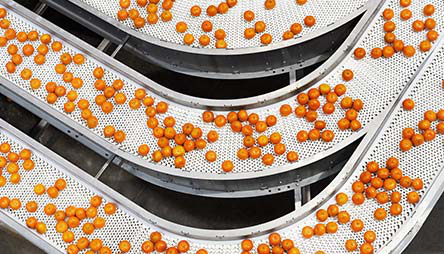

PESSOAS TRABALHANDO PARA SIMPLIFICAR INFRAESTRUTURA DE TI: http://1.cms.s81c.com/sites/default/files/2022-02-14/cloud-five-levers-444x254.jpg


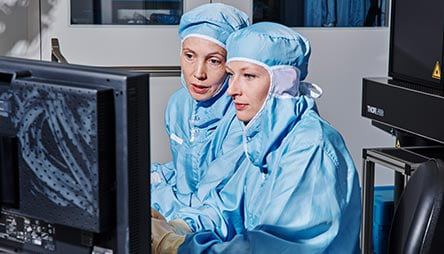

CONSULTORIA EMPRESARIAL COM CONSULTOR DE IBM CONSULTING: http://1.cms.s81c.com/sites/default/files/2022-02-14/consulting-five-levers-444x254.jpg


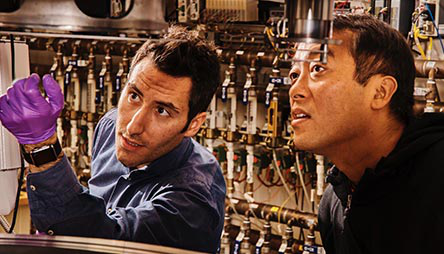

AUTOMAÇÃO EMPRESARIAL COM AIOPS: http://1.cms.s81c.com/sites/default/files/2022-02-14/automate-five-levers-444x254.jpg


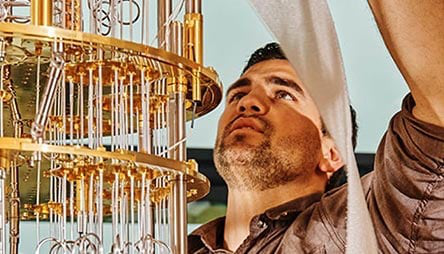

SEGURANÇA CIBERNÉTICA E SEGURANÇA DE DADOS COM PROFISSIONAL DE IBM SECURITY: http://1.cms.s81c.com/sites/default/files/2022-02-14/security-five-levers-444x254.jpg


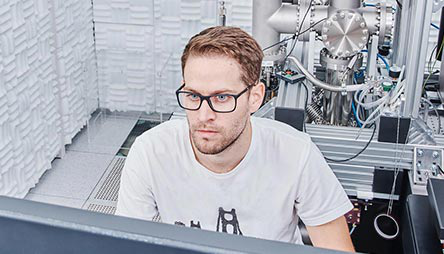

SEGURANÇA CIBERNÉTICA COM MAAS360: http://1.cms.s81c.com/sites/default/files/2022-09-27/00NW_Multiple%20Users_600x300_ER-28399.png


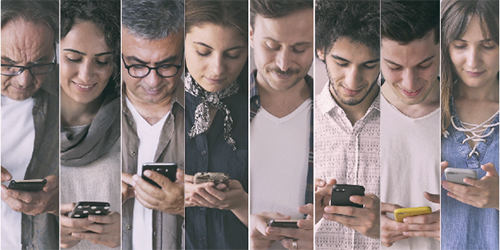

MONITOR MOSTRANDRO SOFTWARE PARA GERENCIAMENTO DE ATIVOS EMPRESARIAIS: http://1.cms.s81c.com/sites/default/files/2022-08-08/card-maximo-gerenciamento-de-ativos-empresariais3.jpg


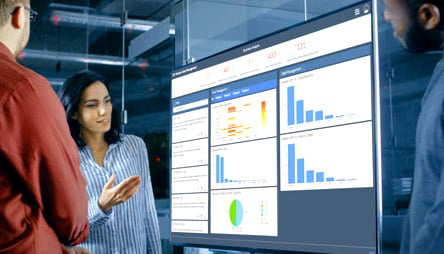

REPRESENTACAO DE AUTOMAÇÃO INTELIGENTE PARA DADOS DE NEGÓCIOS: http://1.cms.s81c.com/sites/default/files/2022-08-08/card-automacao-para-dados-de-negocios.jpg


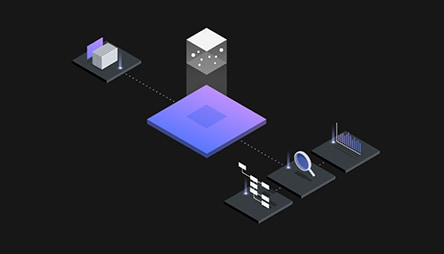

REPRESENTAÇÃO DE ARQUITETURA DE DADOS DATA FABRIC: http://1.cms.s81c.com/sites/default/files/2022-08-08/card-arquitetura-data-fabric.jpg


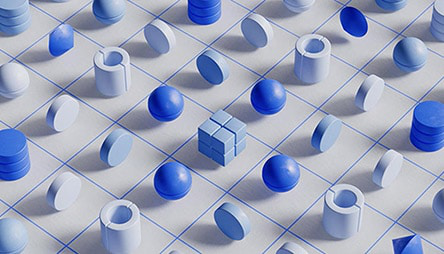

REPRESENTAÇÃO DE AUTOMAÇÃO RPA: http://1.cms.s81c.com/sites/default/files/2022-08-08/card-rpa-automacao.jpg


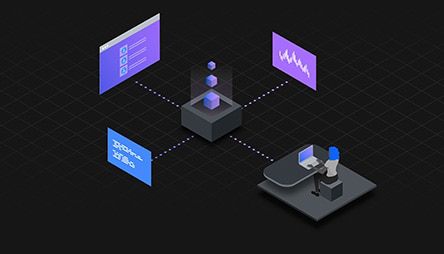

COMPUTADOR MOSTRANDO ALERTA DE PROTEÇÃO CONTRA AMEAÇAS CIBERNÉTICAS: http://1.cms.s81c.com/sites/default/files/2022-08-08/card-protecao-ameacas-ciberneticas.jpg


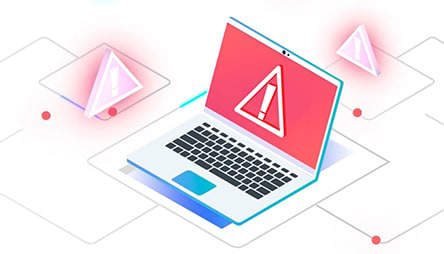

In [94]:
def extract_image_from_html(url):
    return None

for link in soup.find_all('img'):# in html image is represented by the tag <img>
    #print(link)
    #print(link.get('src'))

    image = "http:"+link.get('src')
    title = link.get('alt')
    print(title.upper()+": "+image)
    show_url_image(image)


## Scrape data from HTML tables


In [95]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check how many rows and columns are there in the color table.


In [96]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [97]:
soup = BeautifulSoup(data,"html.parser")

In [99]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>
table

<table border="1" class="main-table">
<tr>
<td>Number </td>
<td>Color</td>
<td>Color Name</td>
<td>Hex Code<br/>#RRGGBB</td>
<td>Decimal Code<br/>(R,G,B)</td>
</tr>
<tr>
<td>1</td>
<td style="background:lightsalmon;"> </td>
<td>lightsalmon</td>
<td>#FFA07A</td>
<td>rgb(255,160,122)</td>
</tr>
<tr>
<td>2</td>
<td style="background:salmon;"> </td>
<td>salmon</td>
<td>#FA8072</td>
<td>rgb(250,128,114)</td>
</tr>
<tr>
<td>3</td>
<td style="background:darksalmon;"> </td>
<td>darksalmon</td>
<td>#E9967A</td>
<td>rgb(233,150,122)</td>
</tr>
<tr>
<td>4</td>
<td style="background:lightcoral;"> </td>
<td>lightcoral</td>
<td>#F08080</td>
<td>rgb(240,128,128)</td>
</tr>
<tr>
<td>5</td>
<td style="background:coral;"> </td>
<td>coral</td>
<td>#FF7F50</td>
<td>rgb(255,127,80)</td>
</tr>
<tr>
<td>6</td>
<td style="background:tomato;"> </td>
<td>tomato</td>
<td>#FF6347</td>
<td>rgb(255,99,71)</td>
</tr>
<tr>
<td>7</td>
<td style="background:orangered;"> </td>
<td>orangered</td>
<td>#FF4500</td>
<td>rgb

In [107]:
#Get all rows from the table
print("\nCOLOR_NAME\t--->\tCOLOR_CODE :: RGB\n")
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    rgb_code = cols[4].string # store the value in column 5 as rgb_code
    print("{}\t--->\t{} :: {}".format(color_name,color_code,rgb_code))


COLOR_NAME	--->	COLOR_CODE :: RGB

Color Name	--->	None :: None
lightsalmon	--->	#FFA07A :: rgb(255,160,122)
salmon	--->	#FA8072 :: rgb(250,128,114)
darksalmon	--->	#E9967A :: rgb(233,150,122)
lightcoral	--->	#F08080 :: rgb(240,128,128)
coral	--->	#FF7F50 :: rgb(255,127,80)
tomato	--->	#FF6347 :: rgb(255,99,71)
orangered	--->	#FF4500 :: rgb(255,69,0)
gold	--->	#FFD700 :: rgb(255,215,0)
orange	--->	#FFA500 :: rgb(255,165,0)
darkorange	--->	#FF8C00 :: rgb(255,140,0)
lightyellow	--->	#FFFFE0 :: rgb(255,255,224)
lemonchiffon	--->	#FFFACD :: rgb(255,250,205)
papayawhip	--->	#FFEFD5 :: rgb(255,239,213)
moccasin	--->	#FFE4B5 :: rgb(255,228,181)
peachpuff	--->	#FFDAB9 :: rgb(255,218,185)
palegoldenrod	--->	#EEE8AA :: rgb(238,232,170)
khaki	--->	#F0E68C :: rgb(240,230,140)
darkkhaki	--->	#BDB76B :: rgb(189,183,107)
yellow	--->	#FFFF00 :: rgb(255,255,0)
lawngreen	--->	#7CFC00 :: rgb(124,252,0)
chartreuse	--->	#7FFF00 :: rgb(127,255,0)
limegreen	--->	#32CD32 :: rgb(50,205,50)
lime	--->	#00FF00 :

## Scrape data from HTML tables into a DataFrame using BeautifulSoup and Pandas


In [108]:
import pandas as pd

In [109]:
#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check the tables on the webpage.


In [110]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [111]:
soup = BeautifulSoup(data,"html.parser")

In [112]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [113]:
# we can see how many tables were found by checking the length of the tables list
len(tables)

25

Assume that we are looking for the `10 most densly populated countries` table, we can look through the tables list and find the right one we are look for based on the data in each table or we can search for the table name if it is in the table but this option might not always work.


In [114]:
for index,table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

5


See if you can locate the table name of the table, `10 most densly populated countries`, below.


In [115]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
 </caption>
 <tbody>
  <tr>
   <th>
    Rank
   </th>
   <th>
    Country
   </th>
   <th>
    Population
   </th>
   <th>
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th>
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/35px-Flag_of_Singapore.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapo

In [116]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[1].text
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        population_data = population_data.append({"Rank":rank, "Country":country, "Population":population, "Area":area, "Density":density}, ignore_index=True)

population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,704,000",710,"8,033"
1,2,Bangladesh,"173,490,000","143,998","1,205"
2,3,\n Palestine\n\n,"5,266,785","6,020",847
3,4,Lebanon,"6,856,000","10,452",656
4,5,Taiwan,"23,604,000","36,193",652
5,6,South Korea,"51,781,000","99,538",520
6,7,Rwanda,"12,374,000","26,338",470
7,8,Haiti,"11,578,000","27,065",428
8,9,Netherlands,"17,750,000","41,526",427
9,10,Israel,"9,580,000","22,072",434


## Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html


Using the same `url`, `data`, `soup`, and `tables` object as in the last section we can use the `read_html` function to create a DataFrame.

Remember the table we need is located in `tables[table_index]`

We can now use the `pandas` function `read_html` and give it the string version of the table as well as the `flavor` which is the parsing engine `bs4`.


In [59]:
pd.read_html(str(tables[5]), flavor='bs4')

[   Rank      Country  Population  Area(km2)  Density(pop/km2)
 0     1    Singapore     5704000        710              8033
 1     2   Bangladesh   171670000     143998              1192
 2     3    Palestine     5266785       6020               847
 3     4      Lebanon     6856000      10452               656
 4     5       Taiwan    23604000      36193               652
 5     6  South Korea    51781000      99538               520
 6     7       Rwanda    12374000      26338               470
 7     8        Haiti    11578000      27065               428
 8     9  Netherlands    17660000      41526               425
 9    10       Israel     9430000      22072               427]

The function `read_html` always returns a list of DataFrames so we must pick the one we want out of the list.


In [118]:
population_data_read_html = pd.read_html(str(tables[5]), flavor='bs4')[0]

population_data_read_html

,0,1,2,3,4
0,Rank,Country,Population,Area(km2),Density(pop/km2)
1,1,Singapore,5704000,710,8033
2,2,Bangladesh,173490000,143998,1205
3,3,Palestine,5266785,6020,847
4,4,Lebanon,6856000,10452,656
5,5,Taiwan,23604000,36193,652
6,6,South Korea,51781000,99538,520
7,7,Rwanda,12374000,26338,470
8,8,Haiti,11578000,27065,428
9,9,Netherlands,17750000,41526,427


## Scrape data from HTML tables into a DataFrame using read_html


We can also use the `read_html` function to directly get DataFrames from a `url`.


In [119]:
dataframe_list = pd.read_html(url, flavor='bs4')

We can see there are 25 DataFrames just like when we used `find_all` on the `soup` object.


In [120]:
len(dataframe_list)

25

Finally we can pick the DataFrame we need out of the list.


In [121]:
dataframe_list[5]

,0,1,2,3,4
0,Rank,Country,Population,Area(km2),Density(pop/km2)
1,1,Singapore,5704000,710,8033
2,2,Bangladesh,173490000,143998,1205
3,3,Palestine,5266785,6020,847
4,4,Lebanon,6856000,10452,656
5,5,Taiwan,23604000,36193,652
6,6,South Korea,51781000,99538,520
7,7,Rwanda,12374000,26338,470
8,8,Haiti,11578000,27065,428
9,9,Netherlands,17750000,41526,427


We can also use the `match` parameter to select the specific table we want. If the table contains a string matching the text it will be read.


In [122]:
pd.read_html(url, match="10 most densely populated countries", flavor='bs4')[0]

,0,1,2,3,4
0,Rank,Country,Population,Area(km2),Density(pop/km2)
1,1,Singapore,5704000,710,8033
2,2,Bangladesh,173490000,143998,1205
3,3,Palestine,5266785,6020,847
4,4,Lebanon,6856000,10452,656
5,5,Taiwan,23604000,36193,652
6,6,South Korea,51781000,99538,520
7,7,Rwanda,12374000,26338,470
8,8,Haiti,11578000,27065,428
9,9,Netherlands,17750000,41526,427


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By                                               | Change Description |
| ----------------- | ------- | -------------------------------------------------------- | ------------------ |
| 2021-08-04        | 0.2     | Made changes to markdown of nextsibling                  |                    |
| 2020-10-17        | 0.1     | Joseph Santarcangelo  Created initial version of the lab |                    |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork-19487395&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
